In [187]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [188]:
# Set this value to True to save image output
save = False

# Instructions:
#   Run the code blocks one at a time to see the results.
#   Change the input image by modifying the variable below:
input_img = 'dog.png'

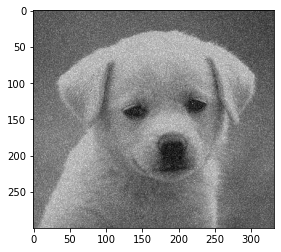

In [189]:
# Import original image with noise
f = np.array(plt.imread(input_img), dtype=float)
plt.imshow(f,cmap='gray')

In [190]:
# gradient helper function
def gradient(A):
    out = np.zeros((2, ) + A.shape)
    
    slices1 = [0, slice(0, -1), slice(None)]
    slices2 = [1, slice(None), slice(0, -1)]
    out[tuple(slices1)] = np.diff(A, axis=0)
    out[tuple(slices2)] = np.diff(A, axis=1)
    return out

In [200]:
# denoise function
def denoise(image, weight=0.1, tau=0.125, eps=2.e-4, n_iter=200):
    n, m = image.shape[0], image.shape[1]
    u = np.zeros((n, m))
    gx = np.zeros((n, m))
    gy = np.zeros((n, m))
    i = 0
    
    while i < n_iter:
        u_i = u
        uy, ux = gradient(u)
        
        gx_new = gx + (tau / weight) * ux
        gy_new = gy + (tau / weight) * uy
        
        norm_coeff = np.maximum(1, np.sqrt(gx_new **2 + gy_new ** 2))
        gx = gx_new / norm_coeff
        gy = gy_new / norm_coeff
        
        # calculate divergence
        div_g = (gx - np.roll(gx, 1, axis=1)) + (gy - np.roll(gy, 1, axis=0))
        
        # update image
        u = image + weight * div_g
        
        # update error
        E = np.linalg.norm(u-u_i) / np.sqrt(n*m);
        if i == 0:
            E_init = E
            E_previous = E
        else:
            if np.abs(E_previous - E) < eps * E_init:
                break
            else:
                E_previous = E
        
        i += 1
    return u

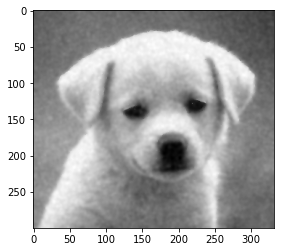

In [192]:
# Default Parameter
f_denoised_default = denoise(f)
plt.imshow(fnew,cmap='gray')
if save:
    plt.imsave('dog_denoised_default.png', f_denoised_default, cmap='gray')

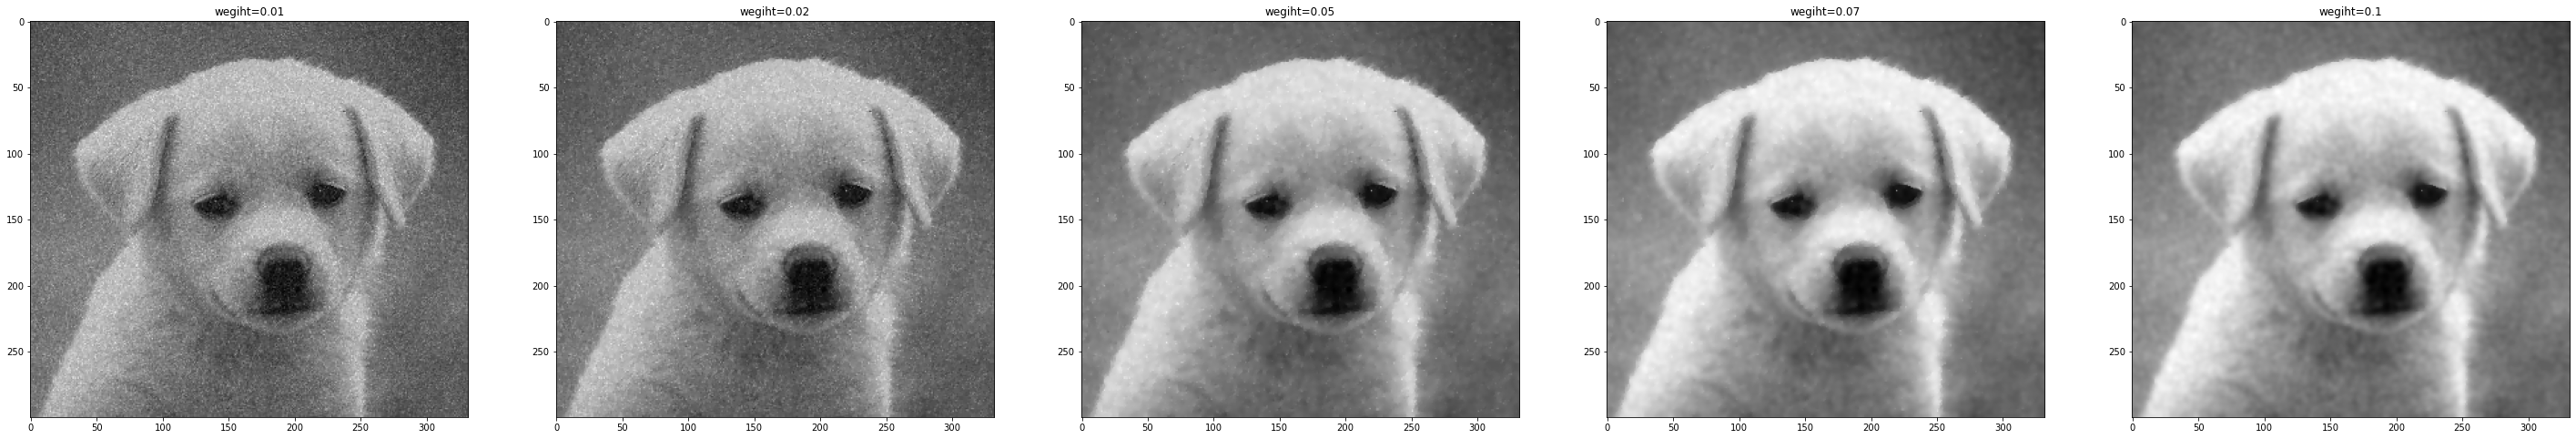

In [193]:
# weight = 0.01
fw01 = denoise(f, weight=0.01)
# weight = 0.1
fw02 = denoise(f, weight=0.02)
# weight = 0.5
fw03 = denoise(f, weight=0.05)
# weight = 0.7
fw04 = denoise(f, weight=0.07)
# weight = 1
fw05 = denoise(f, weight=0.1)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(50,50))

ax1.imshow(fw01,cmap='gray')
ax1.title.set_text("wegiht=0.01")
ax2.imshow(fw02,cmap='gray')
ax2.title.set_text("wegiht=0.02")
ax3.imshow(fw03,cmap='gray')
ax3.title.set_text("wegiht=0.05")
ax4.imshow(fw04,cmap='gray')
ax4.title.set_text("wegiht=0.07")
ax5.imshow(fw05,cmap='gray')
ax5.title.set_text("wegiht=0.1")
fig.show()

if save:
    plt.imsave('dog_denoised_w0.01.png', fw01, cmap='gray')
    plt.imsave('dog_denoised_w0.02.png', fw02, cmap='gray')
    plt.imsave('dog_denoised_w0.05.png', fw03, cmap='gray')
    plt.imsave('dog_denoised_w0.07.png', fw04, cmap='gray')

12
10
6
3
2


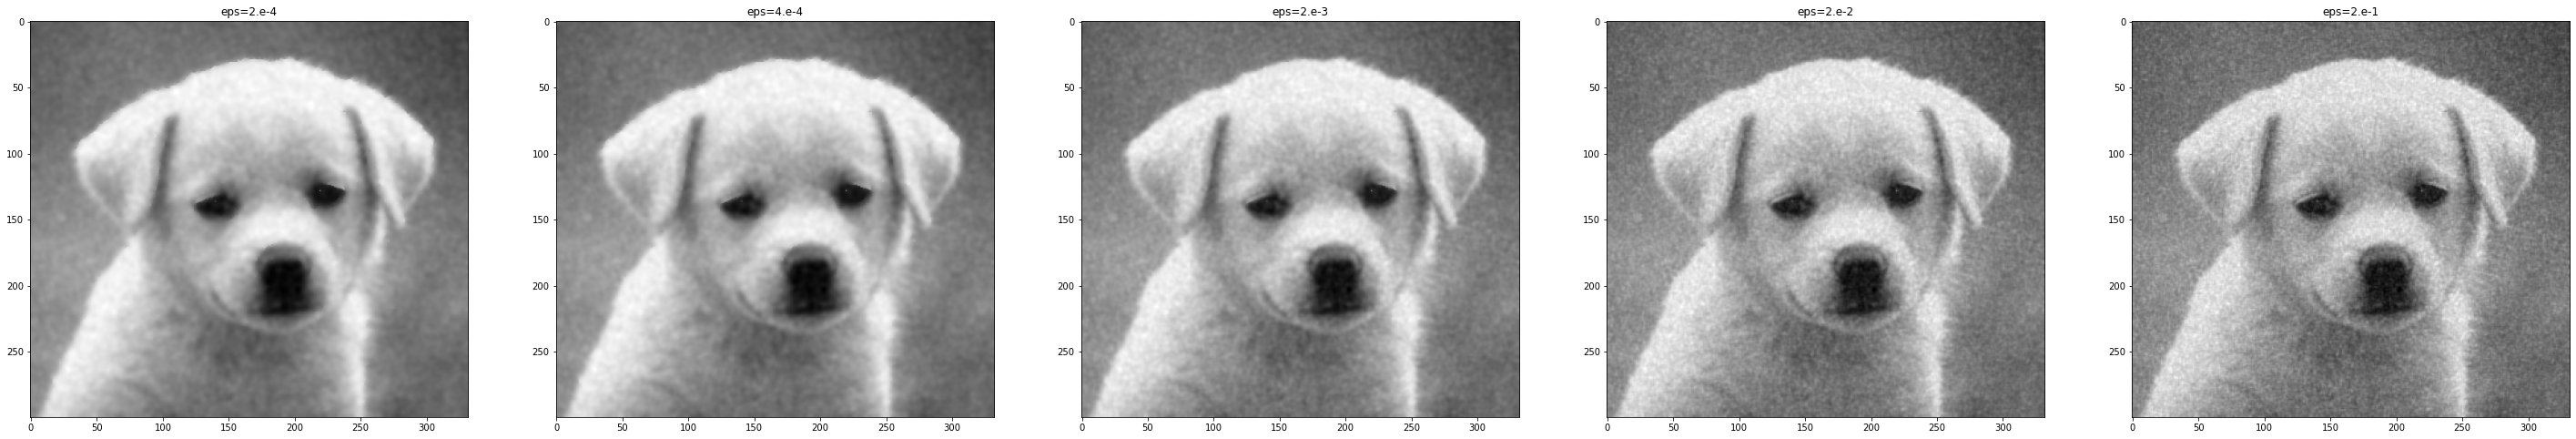

In [201]:
# Change eps values
feps1 = denoise(f, eps=2.e-4)
feps2 = denoise(f, eps=4.e-4)
feps3 = denoise(f, eps=2.e-3)
feps4 = denoise(f, eps=2.e-2)
feps5 = denoise(f, eps=2.e-1)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(50,50))

ax1.imshow(feps1,cmap='gray')
ax1.title.set_text("eps=2.e-4")
ax2.imshow(feps2,cmap='gray')
ax2.title.set_text("eps=4.e-4")
ax3.imshow(feps3,cmap='gray')
ax3.title.set_text("eps=2.e-3")
ax4.imshow(feps4,cmap='gray')
ax4.title.set_text("eps=2.e-2")
ax5.imshow(feps5,cmap='gray')
ax5.title.set_text("eps=2.e-1")
fig.show()

if save:
    plt.imsave('dog_denoised_eps4e-4.png', feps2, cmap='gray')
    plt.imsave('dog_denoised_eps2e-3.png', feps3, cmap='gray')
    plt.imsave('dog_denoised_eps2e-2.png', feps4, cmap='gray')
    plt.imsave('dog_denoised_eps2e-1.png', feps5, cmap='gray')

12
15
18
17
2


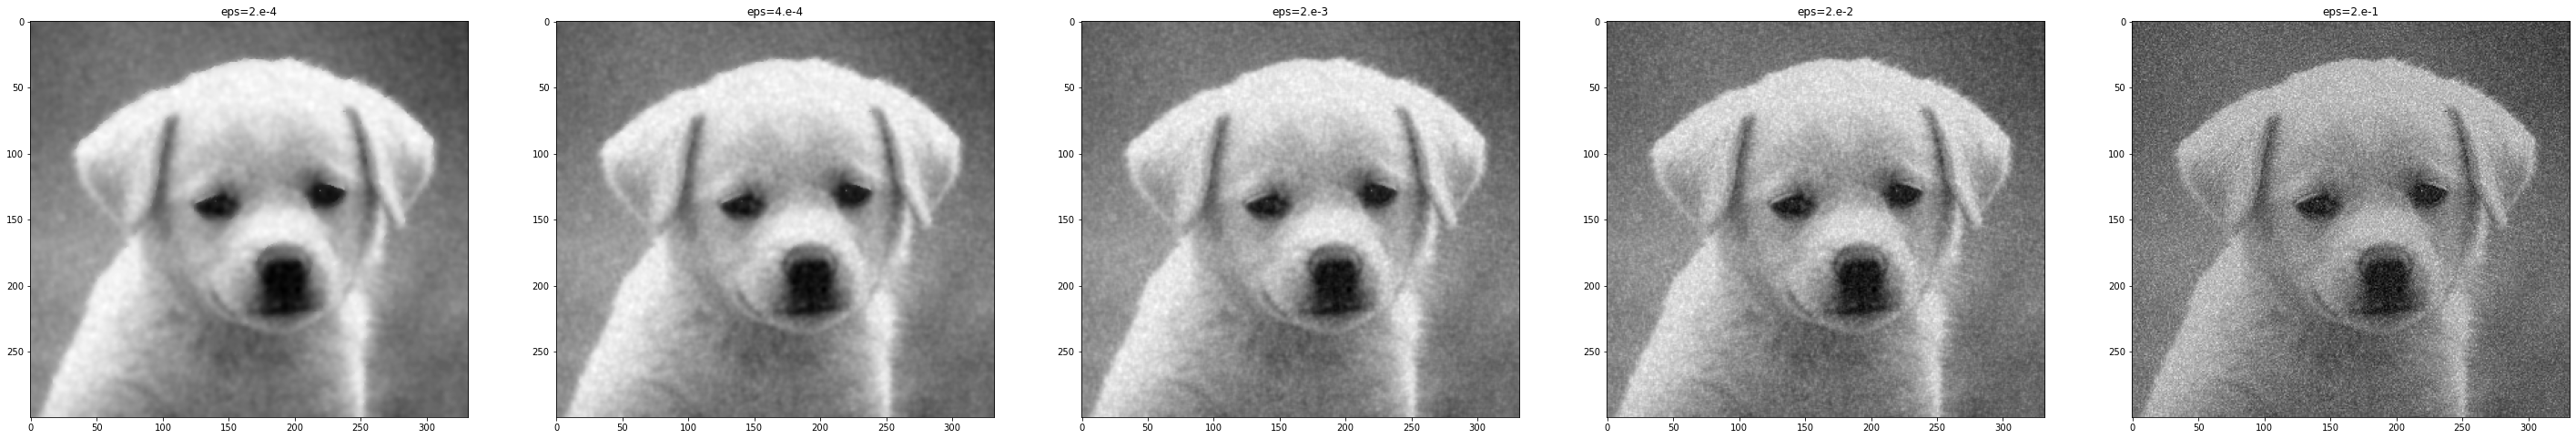

In [202]:
# Change tau values
ftau1 = denoise(f, tau=1/8)
ftau2 = denoise(f, tau=1/16)
ftau3 = denoise(f, tau=1/32)
ftau4 = denoise(f, tau=1/64)
ftau5 = denoise(f, tau=1/128)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(50,50))

ax1.imshow(ftau1,cmap='gray')
ax1.title.set_text("eps=2.e-4")
ax2.imshow(ftau2,cmap='gray')
ax2.title.set_text("eps=4.e-4")
ax3.imshow(ftau3,cmap='gray')
ax3.title.set_text("eps=2.e-3")
ax4.imshow(ftau4,cmap='gray')
ax4.title.set_text("eps=2.e-2")
ax5.imshow(ftau5,cmap='gray')
ax5.title.set_text("eps=2.e-1")
fig.show()

if save:
    plt.imsave('dog_denoised_tau16.png', ftau2, cmap='gray')
    plt.imsave('dog_denoised_tau32.png', ftau3, cmap='gray')
    plt.imsave('dog_denoised_tau64.png', ftau4, cmap='gray')
    plt.imsave('dog_denoised_tau128.png', ftau5, cmap='gray')